# 作业10：颜色空间转换 

作业目的：

    掌握颜色空间相互转换的方法，重点掌握HSI、CMYK和RGB四种颜色模型及其含义


作业内容：

    （1）查阅网络文献，写出RGB与HSI，RGB与CMYK相互转换的公式

## RGB 色度模型 转换到 CMY 色度模型

CMY 色度模型,由于他们是通过从白光中分别减去RGB三原色而得到，故常把青、品红和蓝称为三减色,因为CMY模型不能产生黑色,实际应用中我们通常模型中额外加入第四种颜色黑色用 K 表示。以此 CMY 模型进而提升为CMYK模型。

转换公式:

$ \begin{bmatrix} C \\ M \\ Y  \end{bmatrix} = \begin{bmatrix} 1 \\ 1 \\ 1 \end{bmatrix} - \begin{bmatrix} R \\ G \\ B \end{bmatrix}$

$ \begin{bmatrix} C \\ M \\ Y  \end{bmatrix} = \begin{bmatrix} 255 \\ 255 \\ 255 \end{bmatrix} - \begin{bmatrix} R \\ G \\ B \end{bmatrix}$

$ K =min(C,M,Y)$

$C=C-K$

$M=M-K$

$Y=Y-K$

由此我们可以看的出,如果不加上K=min(C,M,Y)然后相减,且RGB的值都不为 1 (或 255) 就没有办法创造真正的黑色。


## CMYK 色度模型 转换到 RGB 色度模型

$R = 255 - (C + K)$

$G = 255 - (M + K)$

$B = 255 - (Y + K)$

## RGB 色度模型 转换到 HSI 色度模型

HSI 色度模型。这个模型是仿照人的视角用色调、饱和度和亮度来描述颜色

$ H= \left\{
    \begin{aligned}
    \theta   &      & if&&B \le G \\
    360-\theta   &      & if&&B>G
\end{aligned}
\right.
$

$ \theta = \cos^{-1}\left\{\frac{\frac{1}{2}[(R-G)+(R-B)]}{[(R-G)^2+(R-B)(G-B)]^{\frac{1}{2}}} \right\} $

$ S = 1- \frac{3}{R+G+B}\left[min(R,G,B)\right]$

$ I=\frac{1}{3}(R+G+B)$


## HSI(HSL) 色度模型 转换到 RGB 色度模型

$h=\frac{H*\pi}{180} $
$s= \frac{S}{100}$
$i=\frac{I}{255}$

$x=i*(1-s)$

$y=i*\left[1+\frac{s*\cos(h)}{cos(\frac{\pi}{3-h})} \right] $

$z=3*i-(x+y)$

$
\left\{
    \begin{aligned}
    b=x,r=y,g=z   &      & when&& h < \frac{2\pi}{3} \\
    h=h-\frac{2\pi}{3},r=x,g=y,b=z   &      & when&& \frac{2\pi}{3} \le h < \frac{4\pi}{3} \\
    h=h-\frac{4\pi}{3},g=x,b=y,r=z   &      & when&& \frac{4\pi}{3} \le h < 2\pi 
\end{aligned}
\right.
$

r.g.b 都是属于\[0,1\] 最后与255相乘再展示出来

In [73]:
import matplotlib.pyplot as plt
from skimage import io,data,color
import numpy as np
import cv2

    （2）编写实现RGB与HSI、RGB与CMYK相互转换的代码。

In [43]:
def rgb2cmyk(rgb):
    rows = int(rgb.shape[0])
    cols = int(rgb.shape[1])
    r, g, b = cv2.split(rgb)
    # 归一化到[0,1]
    b = b / 255.0
    g = g / 255.0
    r = r / 255.0
    cmyk = rgb.copy()
    
    for i in range(rows):
        for j in range(cols):
            C=1-r[i][j]
            M=1-g[i][j]
            Y=1-b[i][j]
            cmyk[i, j, 0] = C*255
            cmyk[i, j, 1] = M*255
            cmyk[i, j, 2] = Y*255

    C, M, Y = cv2.split(cmyk)
    K=min([C.min(),M.min(),Y.min()])
    C=((C-K)/(255-K))*255
    M=((M-K)/(255-K))*255
    Y=((Y-K)/(255-K))*255
    cmyk[:, :,0]=C
    cmyk[:, :,1]=M
    cmyk[:, :,2]=Y
    return cmyk

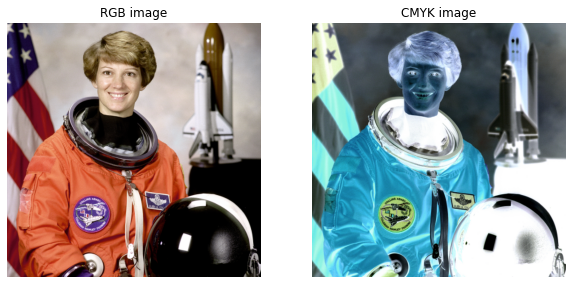

In [51]:
img=data.astronaut()

plt.figure(figsize=(10,5)) #设置窗口大小
plt.subplot(1,2,1), plt.title('RGB image')
plt.imshow(img)
plt.axis('off')
plt.subplot(1,2,2), plt.title('CMYK image')
plt.imshow(rgb2cmyk(img))
plt.axis('off')
plt.show()

In [55]:
def rgb2hsi(rgb):
    rows = int(rgb.shape[0])
    cols = int(rgb.shape[1])
    r, g, b = cv2.split(rgb)
    # 归一化到[0,1]
    b = b / 255.0
    g = g / 255.0
    r = r / 255.0
    hsi = rgb.copy()
    H, S, I = cv2.split(hsi)
    for i in range(rows):
        for j in range(cols):
            num = 0.5 * ((r[i, j]-g[i, j])+(r[i, j]-b[i, j]))
            den = np.sqrt((r[i, j]-g[i, j])**2+(r[i, j]-b[i, j])*(g[i, j]-b[i, j]))
            theta = float(np.arccos(num/den))

            if den == 0:
                    H = 0
            elif b[i, j] <= g[i, j]:
                H = theta
            else:
                H = 2*3.14169265 - theta

            min_RGB = min(min(b[i, j], g[i, j]), r[i, j])
            sum = b[i, j]+g[i, j]+r[i, j]
            if sum == 0:
                S = 0
            else:
                S = 1 - 3*min_RGB/sum

            H = H/(2*3.14159265)
            I = sum/3.0
            # 输出HSI图像，扩充到255以方便显示，一般H分量在[0,2pi]之间，S和I在[0,1]之间
            hsi[i, j, 0] = H*255
            hsi[i, j, 1] = S*255
            hsi[i, j, 2] = I*255
    return hsi

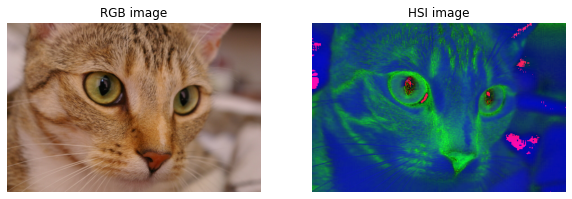

In [56]:
img=data.chelsea()

plt.figure(figsize=(10,5)) #设置窗口大小
plt.subplot(1,2,1), plt.title('RGB image')
plt.imshow(img)
plt.axis('off')
plt.subplot(1,2,2), plt.title('HSI image')
plt.imshow(rgb2hsi(img))
plt.axis('off')
plt.show()

    （3）任意设定三组RGB数值，用自己编写的代码计算转换后的HSI、CMYK的值，并与skimage内置转换函数进行对比

In [81]:
rgb=np.array([[[226, 137, 125]], [[106,107,173]], [[29, 118, 130]]])

print('rgb2hsi:\n',rgb2hsi(rgb))

print('rgb2cmyk:\n',rgb2cmyk(rgb))

print('rgb2ydbdr:\n',color.convert_colorspace(rgb, 'rgb', 'ydbdr') )

print('rgb2ycbcr:\n',color.convert_colorspace(rgb, 'rgb', 'ycbcr') )

rgb2hsi:
 [[[  4  59 162]]

 [[169  44 128]]

 [[131 174  92]]]
rgb2cmyk:
 [[[  0 100 113]]

 [[134 133  58]]

 [[222 121 108]]]
rgb2ydbdr:
 [[[ 1.76446314e-17 -6.07651950e-18 -1.31449756e-17]]

 [[ 1.24385094e-17  9.58738297e-18  1.69731850e-18]]

 [[ 1.01109442e-17  6.07651950e-18  1.31449756e-17]]]
rgb2ycbcr:
 [[[ 16. 128. 128.]]

 [[ 16. 128. 128.]]

 [[ 16. 128. 128.]]]


    （4）在PHOTOSHOP的颜色选择窗口中输入步骤（3）中设定三组RGB，对界面上显示的HSV  CMYK值进行截屏

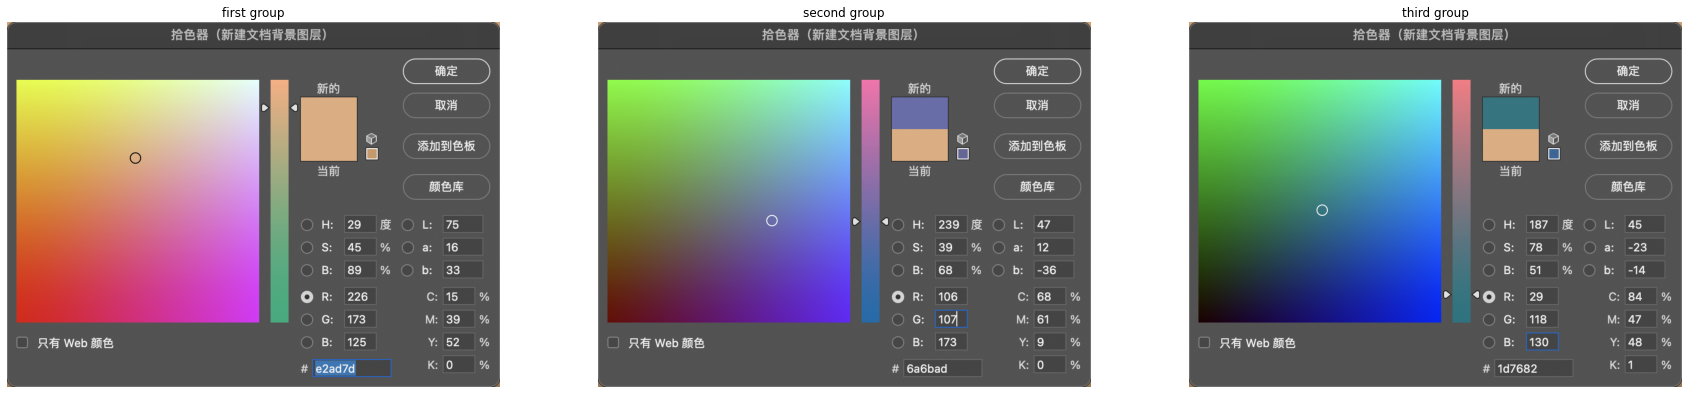

In [84]:
plt.figure(figsize=(30,10)) #设置窗口大小
plt.subplot(1,3,1), plt.title('first group')
plt.imshow(io.imread('./img/first.png'))
plt.axis('off')
plt.subplot(1,3,2), plt.title('second group')
plt.imshow(io.imread('./img/second.png'))
plt.axis('off')
plt.subplot(1,3,3), plt.title('third group')
plt.imshow(io.imread('./img/third.png'))
plt.axis('off')
plt.show()

作业要求：

    （1）PDF格式文档

    （2）给出相关的源代码及对比结果